# Mile stone 2
# INFO NEEDS - Choosing More Concrete Information Needs
## Original Info Need
- **Relate artist background to lyrics:** Connect the personal or professional background of an artist with the lyrical content of their songs.
## Observation from Top Artists
- the most comon artists are rock and pop artits
- Looking at the artists with the most songs, the themes most reflected in their music are:
  - Romantic heartbreak
  - Inequality and marginalization
  - Personal struggle and redemption

## Concrete Information Need
- **Music where the artist expresses pain or sadness from love breakups.**


               artist_name  num_songs
100           Donna Summer        191
171       Gordon Lightfoot        189
163          George Strait        188
39               Bob Dylan        188
60                    Cher        187
421          Reba Mcentire        187
286           Loretta Lynn        187
7                  Alabama        187
58              Chaka Khan        186
86             Dean Martin        186
182      Hank Williams Jr.        185
330             Neil Young        185
205           Indigo Girls        184
326               Nazareth        184
71           Cliff Richard        184
15                 America        184
261                   Kiss        183
233            Johnny Cash        183
64               Chris Rea        182
43                Bon Jovi        181
96            Dolly Parton        180
142          Fleetwood Mac        180
431         Rolling Stones        179
87             Deep Purple        179
430            Rod Stewart        178
29          

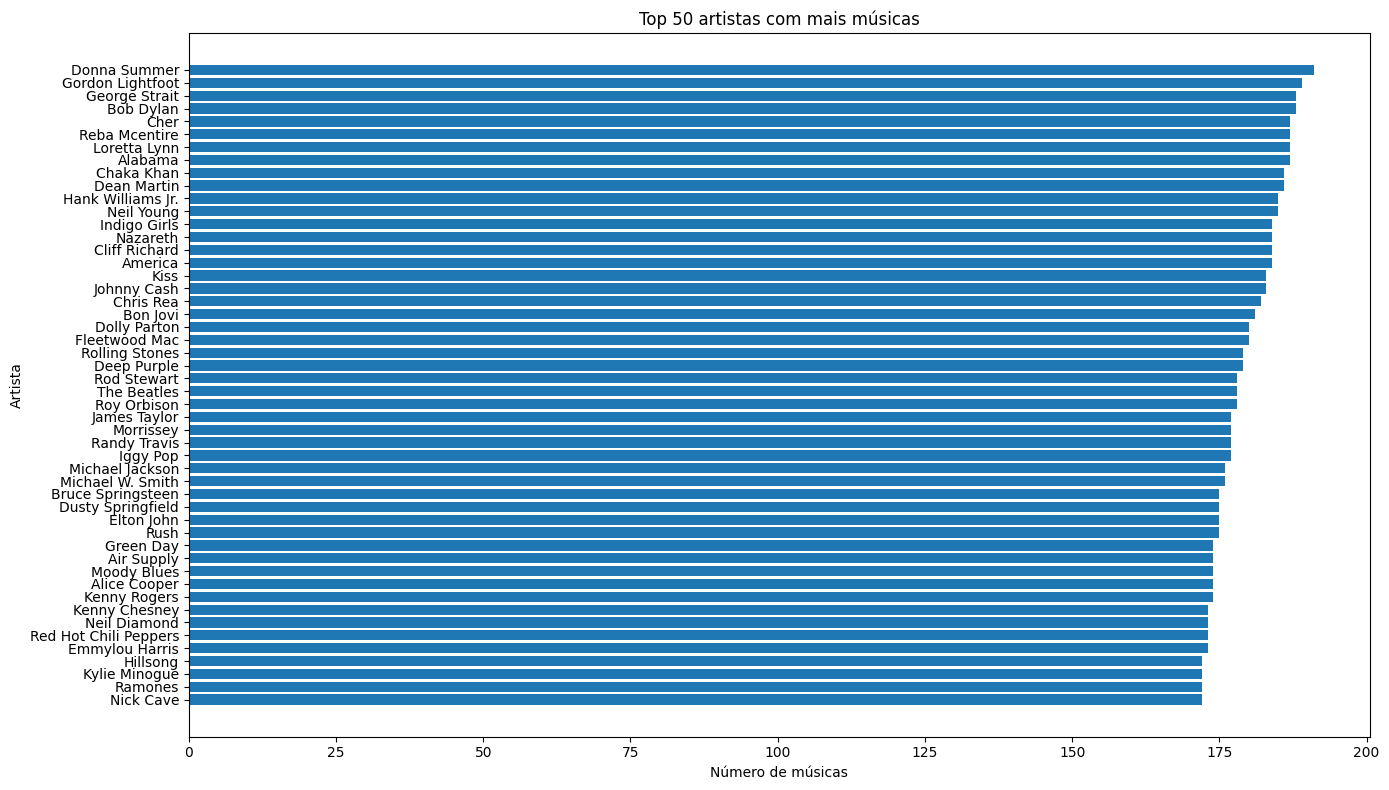

In [2]:
import pandas as pd
from data_utils import getDataAnal

music = pd.read_csv("../dataset/song.csv")
artists = pd.read_csv("../dataset/artist.csv")

getDataAnal(music, artists)



## Possible Techniques to Apply in Solr

1. **Field Boosting**
   - Give more weight to relevant fields :
     - `song_lyrics` (High weight)
     - `artist_bio` (medium weight)
     - `song_name` (low weight)
     - `album_name` (low weight)
   - The song and album name can be very importante but only if we get an exact hit, so that exact hits should be added in 

2. **Term Boosting**
   - Give higher relevance to specific terms in the query:
     - `"broken heart"^5`, `heartbreak^5`, `breakup^4 `,`love^2`, `sadness^2`, `cheating^4`

3. **Independent / Function Boosting**
   - Boost scores based on numeric or metadata fields:
4. **Phrase Match with Slop**
   - Match exact or approximate phrases:
     - `"broken heart"~2` → allows up to 2 words between terms
   - Use of the methafor dictionary to catch some poetic expressions used in the music

5. **Proximity Search**
   - Find terms that appear close together in the text:
     - `"love heartbreak"~5` → terms within 5 words of each other
     - Use of the methafor dictionary, emotional dictionary and love_context to catch some poetic expressions used in the music

6. **Fuzziness**
   - Handle spelling variations or minor errors:
     - `heart~1` → matches `heart`, `hart`, etc.
     - `love~1` → matches `love`, `loved`, `lover`, etc.
      - Use of the slang words to add more mathces to some words


7. **Wildcards**
   - Capture variations of words:
     - `love*` → matches `love`, `loved`, `lover`, `lovely`
     - `heart?` → matches `hearts`, `hearta` (single character variation)
    - Use of the slang words to add more mathces to some words
8. **Synonyms / Custom Dictionaries**
   - Use synonym lists to expand the query:
     - Example: `heartbreak, breakup, lost love`
     - Example: `love, romance, affection`
     - Can be applied at **index time** or **query time**

9.  **Query-Time Boosting & Phrase Fields**
    - Use `pf` (phrase fields) and `qf` (query fields) in `edismax`:
      - `qf=song_lyrics^5 artist_bio^3 song_name^2`
      - `pf=song_name^15 album_name^12 song_lyrics^10` → boosts exact phrase matches
      - use of synome txt for more Phrase Fields hit
10. **Minimum Match (mm)**
    - Control how many query terms must appear in a document:
      - `mm=2<75%` → at least 2 terms, or 75% if query is long

11. **Tie-breaker (tie)**
    - Adjust how scores from multiple fields are combined:
      - `tie=0.1` → balances contributions of different fields

---



## Query idea:
1. **Field Boosting**
- qf=song_lyrics^5 artist_bio^3 song_name^4 album_name^2
2. **Term Boosting**
- q="broken heart"^5 OR heartbreak^5 OR breakup^4 OR cheating^4 OR love^2 OR sadness^2
3. Phrase Fields
- pf="broken heart"^15 "lost love"^12 "heartache"^10 song_name^15 album_name^12 song_lyrics^10
4. **Phrase Match with Slop**
- "broken heart"~2
- "lost love"~2
5. **Proximity Search**
- "love heartbreak"~5
- "romantic sorrow"~4 
6. **Fuzziness**
- love~1   # matches love, loved, lover
- heart~1  # matches heart, hart

7. **Wildcards**
- love*   # matches love, loved, lover, lovely
- heart?  # matches hearts, hearta
    

## Duvida-
- Os synome filters como aplico dependendo do info need
- como aplicar txt a query 
